<a href="https://colab.research.google.com/github/c-marq/CAP3321C-Data-Wrangling/blob/main/solutions/exercises/2_1_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2-1: Review the Mortality Notebook - SOLUTION

**CAP3321C - Data Wrangling**

---

## Overview

In this exercise, you'll run the cells in the Mortality Notebook. This Notebook includes all the examples that are in Chapter 2, plus a few variations. As you run each cell, be sure that you understand what it does. To help you understand it, you may want to change some of the parameters to see how that changes the results.

**Instructions:**
1. Run each cell in order
2. Observe the output
3. Answer the reflection questions in the markdown cells provided

**Group Members:**
- SOLUTION KEY

---

## Part 1: Get the Data

**Steps 1-4:** Import Pandas, load data from the CDC website, and save/restore the DataFrame.

In [87]:
import pandas as pd

### Read a CSV file from a website into a DataFrame

In [88]:
mortality_url = "https://data.cdc.gov/api/views/v6ab-adf5/rows.csv?accessType=DOWNLOAD"
mortality_data = pd.read_csv(mortality_url)

### Save and restore the DataFrame

In [89]:
mortality_data.to_pickle('mortality_data.pkl')

In [90]:
mortality_data = pd.read_pickle('mortality_data.pkl')

### 🤔 Reflection: Getting Data

**Q1:** Why might you want to save a DataFrame to a pickle file instead of reading from the URL every time?

*Your answer:*

**SOLUTION:** There are several reasons:
1. **Speed** - Reading from a local pickle file is much faster than downloading from the internet
2. **Reliability** - The website might be down, slow, or the data might change
3. **Offline access** - You can work without an internet connection
4. **Data preservation** - The pickle file preserves your data exactly as it was when you saved it, including any cleaning or transformations you've done


---

## Part 2: Examine and Clean the Data

**Steps 5-10:** Display the data using various techniques, examine attributes, and clean column names.

### Display the data

In [91]:
mortality_data

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5
...,...,...,...
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5


In [92]:
mortality_data.head()

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


In [93]:
mortality_data.tail(3)

,Year,Age Group,Death Rate
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5
475,2018,15-19 Years,49.2


In [94]:
display(mortality_data)

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5
...,...,...,...
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5


In [95]:
with pd.option_context(
    'display.max_rows', 5,
    'display.max_columns', None):
    display(mortality_data)

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
...,...,...,...
474,2017,15-19 Years,51.5
475,2018,15-19 Years,49.2


### Display the DataFrame attributes

In [96]:
mortality_data.values

array([[1900, '1-4 Years', 1983.8],
       [1901, '1-4 Years', 1695.0],
       [1902, '1-4 Years', 1655.7],
       ...,
       [2016, '15-19 Years', 51.2],
       [2017, '15-19 Years', 51.5],
       [2018, '15-19 Years', 49.2]], dtype=object)

In [97]:
print("Index:  ", mortality_data.index)
print("Columns:", mortality_data.columns)
print("Size:   ", mortality_data.size)
print("Shape:  ", mortality_data.shape)

Index:   RangeIndex(start=0, stop=476, step=1)
Columns: Index(['Year', 'Age Group', 'Death Rate'], dtype='object')
Size:    1428
Shape:   (476, 3)


### 🤔 Reflection: DataFrame Attributes

**Q2:** Looking at the output above, what is the difference between `size` and `shape`?

*Your answer:*

**SOLUTION:**
- **Size** returns the total number of elements in the DataFrame (rows × columns = 476 × 3 = 1428)
- **Shape** returns a tuple showing the dimensions: (number of rows, number of columns) = (476, 3)

Size is a single number, while shape tells you the structure.


### Use the columns attribute to change the column names

In [98]:
mortality_data.columns = mortality_data.columns.str.replace(" ", "")

In [99]:
print(mortality_data.columns)

Index(['Year', 'AgeGroup', 'DeathRate'], dtype='object')


In [100]:
mortality_data.head()

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


### 🤔 Reflection: Column Names

**Q3:** Why did we remove the spaces from the column names? What problems might spaces cause?

*Your answer:*

**SOLUTION:** Spaces in column names cause problems because:
1. **Dot notation won't work** - You can't use `df.Age Group` (syntax error)
2. **Query strings need backticks** - You'd have to write `query('\`Age Group\` == "1-4 Years"')` which is harder to read
3. **Consistency** - It's a best practice to use underscores or camelCase for column names
4. **Less error-prone** - Easier to type and less likely to make mistakes


### Use the info(), nunique(), and describe() methods

In [101]:
mortality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       476 non-null    int64  
 1   AgeGroup   476 non-null    object 
 2   DeathRate  476 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.3+ KB


In [102]:
mortality_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       476 non-null    int64  
 1   AgeGroup   476 non-null    object 
 2   DeathRate  476 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 35.0 KB


In [103]:
mortality_data.nunique()

,0
Year,119
AgeGroup,4
DeathRate,430


In [104]:
mortality_data.describe()

,Year,DeathRate
count,476.000000,476.000000
mean,1959.000000,192.924160
std,34.387268,293.224216
min,1900.000000,11.400000
25%,1929.000000,40.575000
50%,1959.000000,89.500000
75%,1989.000000,222.575000
max,2018.000000,1983.800000


In [105]:
mortality_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,476.0,1959.00000,34.387268,1900.0,1929.000,1959.0,1989.000,2018.0
DeathRate,476.0,192.92416,293.224216,11.4,40.575,89.5,222.575,1983.8


### 🤔 Reflection: Data Exploration Methods

**Q4:** What does the `.T` attribute do to the describe() output? When might this be useful?

*Your answer:*

**SOLUTION:** The `.T` attribute transposes the DataFrame, swapping rows and columns. In the describe() output:
- Without `.T`: Statistics (count, mean, std, etc.) are rows, columns are variables
- With `.T`: Variables are rows, statistics are columns

This is useful when you have many columns - it makes the output easier to read because you can see all statistics for each variable on one row.

**Q5:** Looking at the `nunique()` output, how many different age groups are in the dataset?

*Your answer:*

**SOLUTION:** There are **4** different age groups in the dataset (shown in the AgeGroup row of nunique() output).


### Save and restore the cleaned DataFrame

In [106]:
mortality_data.to_pickle('mortality_cleaned.pkl')

In [107]:
mortality_data = pd.read_pickle('mortality_cleaned.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


---

## Part 3: Access the Data

**Steps 11-14:** Access columns, rows, and subsets using different methods.

### How to access columns

In [108]:
mortality_data.DeathRate.head(2)

,DeathRate
0,1983.8
1,1695.0


In [109]:
type(mortality_data.DeathRate)

pandas.core.series.Series

In [110]:
mortality_data['DeathRate'].head(2)

,DeathRate
0,1983.8
1,1695.0


In [111]:
type(mortality_data['DeathRate'])

pandas.core.series.Series

In [112]:
mortality_data[['Year','DeathRate']].head(2)

,Year,DeathRate
0,1900,1983.8
1,1901,1695.0


In [113]:
type(mortality_data[['Year','DeathRate']])

pandas.core.frame.DataFrame

### 🤔 Reflection: Accessing Columns

**Q6:** What is the difference in the output when you use single brackets `['DeathRate']` versus double brackets `[['DeathRate']]`? (Hint: Look at the `type()` output)

*Your answer:*

**SOLUTION:**
- **Single brackets** `['DeathRate']` returns a **Series** (a single column)
- **Double brackets** `[['DeathRate']]` returns a **DataFrame** (even if it's just one column)

This matters because Series and DataFrames have different methods available. If you need to keep working with DataFrame methods, use double brackets.


### How to access rows

In [114]:
mortality_data.query('Year==1900')

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
119,1900,5-9 Years,466.1
238,1900,10-14 Years,298.3
357,1900,15-19 Years,484.8


In [115]:
mortality_data.query('Year == 2000 and AgeGroup != "1-4 Years"')

,Year,AgeGroup,DeathRate
219,2000,5-9 Years,15.8
338,2000,10-14 Years,20.3
457,2000,15-19 Years,67.1


In [116]:
mortality_data.query('Year == 1900 or Year == 2000').head()

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
100,2000,1-4 Years,32.4
119,1900,5-9 Years,466.1
219,2000,5-9 Years,15.8
238,1900,10-14 Years,298.3


In [117]:
# use backticks if a column name contains spaces
# mortality_data.query('Year == 2000 and `Age Group` != "1-4 Years"')

### How to access a subset of rows and columns

In [118]:
mortality_data.query('Year == 1900').DeathRate.head()

,DeathRate
0,1983.8
119,466.1
238,298.3
357,484.8


In [119]:
mortality_data.query('Year == 1900')['DeathRate'].head()

,DeathRate
0,1983.8
119,466.1
238,298.3
357,484.8


In [120]:
mortality_data.query('Year == 1900')[['DeathRate']].head()

,DeathRate
0,1983.8
119,466.1
238,298.3
357,484.8


In [121]:
mortality_data.query('Year == 1900')[['AgeGroup','DeathRate']].head()

,AgeGroup,DeathRate
0,1-4 Years,1983.8
119,5-9 Years,466.1
238,10-14 Years,298.3
357,15-19 Years,484.8


### How to access rows and columns with the loc[] accessor

In [122]:
mortality_data.loc[0]

,0
Year,1900
AgeGroup,1-4 Years
DeathRate,1983.8


In [123]:
mortality_data.loc[[0]]

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8


In [124]:
mortality_data.loc[0:2]

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7


In [125]:
mortality_data.loc[[0,2,4]]

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
2,1902,1-4 Years,1655.7
4,1904,1-4 Years,1591.5


In [126]:
mortality_data.loc[:,'Year']

,Year
0,1900
1,1901
2,1902
3,1903
4,1904
...,...
471,2014
472,2015
473,2016
474,2017


In [127]:
mortality_data.loc[:,['Year','DeathRate']]

,Year,DeathRate
0,1900,1983.8
1,1901,1695.0
2,1902,1655.7
3,1903,1542.1
4,1904,1591.5
...,...,...
471,2014,45.5
472,2015,48.3
473,2016,51.2
474,2017,51.5


In [128]:
mortality_data.loc[:,'Year':'DeathRate']

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5
...,...,...,...
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5


In [129]:
mortality_data.loc[0:2, 'Year':'DeathRate']

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7


In [130]:
mortality_data.loc[[0,2,4], ['Year','DeathRate']]

,Year,DeathRate
0,1900,1983.8
2,1902,1655.7
4,1904,1591.5


### How to access rows and columns with the iloc[] accessor

In [131]:
mortality_data.iloc[0]

,0
Year,1900
AgeGroup,1-4 Years
DeathRate,1983.8


In [132]:
mortality_data.iloc[[0]]

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8


In [133]:
mortality_data.iloc[0:2]

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0


In [134]:
mortality_data.iloc[[0,2,4]]

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
2,1902,1-4 Years,1655.7
4,1904,1-4 Years,1591.5


In [135]:
mortality_data.iloc[:,0]

,Year
0,1900
1,1901
2,1902
3,1903
4,1904
...,...
471,2014
472,2015
473,2016
474,2017


In [136]:
mortality_data.iloc[:,[0,2]]

,Year,DeathRate
0,1900,1983.8
1,1901,1695.0
2,1902,1655.7
3,1903,1542.1
4,1904,1591.5
...,...,...
471,2014,45.5
472,2015,48.3
473,2016,51.2
474,2017,51.5


In [137]:
mortality_data.iloc[:,0:2]

,Year,AgeGroup
0,1900,1-4 Years
1,1901,1-4 Years
2,1902,1-4 Years
3,1903,1-4 Years
4,1904,1-4 Years
...,...,...
471,2014,15-19 Years
472,2015,15-19 Years
473,2016,15-19 Years
474,2017,15-19 Years


In [138]:
mortality_data.iloc[0:2, 0:2]

,Year,AgeGroup
0,1900,1-4 Years
1,1901,1-4 Years


In [139]:
mortality_data.iloc[[0,2,4], [0,2]]

,Year,DeathRate
0,1900,1983.8
2,1902,1655.7
4,1904,1591.5


### 🤔 Reflection: loc[] vs iloc[]

**Q7:** What is the key difference between `loc[]` and `iloc[]`? When would you use each?

*Your answer:*

**SOLUTION:**
- **loc[]** uses **labels** (names) - you specify row/column by their actual index labels or column names
- **iloc[]** uses **integer positions** - you specify row/column by their numeric position (0, 1, 2, etc.)

Use `loc[]` when you know the label/name of what you want. Use `iloc[]` when you want to access by position (like "the first 5 rows" or "columns 0 and 2").

**Q8:** Notice that `loc[0:2]` returns 3 rows, but `iloc[0:2]` returns 2 rows. Why is this?

*Your answer:*

**SOLUTION:**
- **loc[]** slicing is **inclusive** on both ends - `loc[0:2]` includes rows with labels 0, 1, AND 2
- **iloc[]** slicing follows Python convention and is **exclusive** on the end - `iloc[0:2]` includes positions 0 and 1, but NOT 2

This is a common source of confusion! Remember: loc includes the endpoint, iloc excludes it.


---

## Part 4: Prepare the Data

**Steps 15-18:** Sort data, apply statistics, perform calculations, and modify string data.

### Sort the data

In [140]:
mortality_data.sort_values('DeathRate').head()

,Year,AgeGroup,DeathRate
231,2012,5-9 Years,11.4
229,2010,5-9 Years,11.5
237,2018,5-9 Years,11.5
233,2014,5-9 Years,11.5
236,2017,5-9 Years,11.6


In [141]:
mortality_data.sort_values('DeathRate', ascending=False).head()

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
4,1904,1-4 Years,1591.5
6,1906,1-4 Years,1580.0


In [142]:
mortality_data.sort_values(['AgeGroup','Year']).head(10)

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5
5,1905,1-4 Years,1498.9
6,1906,1-4 Years,1580.0
7,1907,1-4 Years,1468.3
8,1908,1-4 Years,1396.8
9,1909,1-4 Years,1348.9


### 🤔 Reflection: Sorting

**Q9:** Looking at the first `sort_values()` output, which age group and year had the lowest death rate?

*Your answer:*

**SOLUTION:** The **5-9 Years** age group in **2018** (or recent years) had the lowest death rate. This makes sense as medical advances have significantly reduced childhood mortality over time.


### Apply statistical methods

In [143]:
mortality_data.DeathRate.mean()

np.float64(192.92415966386554)

In [144]:
mortality_data['DeathRate'].mean()

np.float64(192.92415966386554)

In [145]:
mortality_data[['Year','DeathRate']].mean()

,0
Year,1959.00000
DeathRate,192.92416


In [146]:
mortality_data[['Year','DeathRate']].median()

,0
Year,1959.0
DeathRate,89.5


In [147]:
mortality_data[['Year','DeathRate']].mode()

,Year,DeathRate
0,1900,11.5
1,1901,14.6
2,1902,25.3
3,1903,44.6
4,1904,NaN
...,...,...
114,2014,NaN
115,2015,NaN
116,2016,NaN
117,2017,NaN


### Use Python for column arithmetic

In [148]:
mortality_data['MeanCentered'] = mortality_data.DeathRate - mortality_data.DeathRate.mean()

In [149]:
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,1-4 Years,1983.8,1790.87584
1,1901,1-4 Years,1695.0,1502.07584
2,1902,1-4 Years,1655.7,1462.77584
3,1903,1-4 Years,1542.1,1349.17584
4,1904,1-4 Years,1591.5,1398.57584


In [150]:
mortality_data['DeathRate'] = mortality_data.DeathRate / 100000

In [151]:
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,1-4 Years,0.019838,1790.87584
1,1901,1-4 Years,0.016950,1502.07584
2,1902,1-4 Years,0.016557,1462.77584
3,1903,1-4 Years,0.015421,1349.17584
4,1904,1-4 Years,0.015915,1398.57584


### 🤔 Reflection: Column Arithmetic

**Q10:** What does "mean centered" mean? Why might this be useful in data analysis?

*Your answer:*

**SOLUTION:** Mean centering subtracts the average value from each data point, so the new values are centered around 0.

This is useful because:
1. **Easier interpretation** - Positive values are above average, negative values are below average
2. **Comparing datasets** - You can compare values from different scales
3. **Statistical modeling** - Many algorithms work better with centered data
4. **Identifying outliers** - Extreme values stand out more clearly


### Modify the string data in a column

In [152]:
mortality_data.AgeGroup.replace(
    {'1-4 Years':'01-04 Years','5-9 Years':'05-09 Years'},
    inplace = True)

/tmp/ipython-input-359457682.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mortality_data.AgeGroup.replace(


In [153]:
mortality_data

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,0.019838,1790.87584
1,1901,01-04 Years,0.016950,1502.07584
2,1902,01-04 Years,0.016557,1462.77584
3,1903,01-04 Years,0.015421,1349.17584
4,1904,01-04 Years,0.015915,1398.57584
...,...,...,...,...
471,2014,15-19 Years,0.000455,-147.42416
472,2015,15-19 Years,0.000483,-144.62416
473,2016,15-19 Years,0.000512,-141.72416
474,2017,15-19 Years,0.000515,-141.42416


### Save and restore the prepared DataFrame

In [154]:
mortality_data.to_pickle('mortality_prepped.pkl')

In [155]:
mortality_data = pd.read_pickle('mortality_prepped.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,0.019838,1790.87584
1,1901,01-04 Years,0.016950,1502.07584
2,1902,01-04 Years,0.016557,1462.77584
3,1903,01-04 Years,0.015421,1349.17584
4,1904,01-04 Years,0.015915,1398.57584


---

## Part 5: Shape the Data

**Steps 19-23:** Set indexes, pivot data, and melt data.

### Set and use an index

In [156]:
mortality_data.head(2)

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,0.019838,1790.87584
1,1901,01-04 Years,0.016950,1502.07584


In [157]:
mortality_data = mortality_data.set_index('Year')
mortality_data.head(2)

,AgeGroup,DeathRate,MeanCentered
Year,,,
1900,01-04 Years,0.019838,1790.87584
1901,01-04 Years,0.016950,1502.07584


In [158]:
mortality_data.reset_index(inplace=True)

In [159]:
mortality_data = mortality_data.set_index(
    ['Year','AgeGroup'],verify_integrity=True)
mortality_data.head(2)

,,DeathRate,MeanCentered
Year,AgeGroup,,
1900,01-04 Years,0.019838,1790.87584
1901,01-04 Years,0.016950,1502.07584


In [160]:
mortality_data.reset_index(inplace=True)

In [161]:
mortality_data.head(2)

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,0.019838,1790.87584
1,1901,01-04 Years,0.016950,1502.07584


### 🤔 Reflection: Indexes

**Q11:** Why must the index be reset before a new one can be set?

*Your answer:*

**SOLUTION:** When you set a column as the index, that column is removed from the DataFrame columns and becomes the index. If you want to set a different column as the index, you first need to reset the current index to make it a regular column again. Otherwise, you'd lose the data in the current index column, and you couldn't set a column that's already been "used" as an index.


### Pivot the data

In [162]:
mortality_wide = mortality_data.pivot(
    index="Year",columns="AgeGroup")
mortality_wide.head(3)

DeathRate                                     MeanCentered  \
AgeGroup 01-04 Years 05-09 Years 10-14 Years 15-19 Years  01-04 Years   
Year                                                                    
1900        0.019838    0.004661    0.002983    0.004848   1790.87584   
1901        0.016950    0.004276    0.002736    0.004544   1502.07584   
1902        0.016557    0.004033    0.002525    0.004215   1462.77584   

                                              
AgeGroup 05-09 Years 10-14 Years 15-19 Years  
Year                                          
1900       273.17584   105.37584   291.87584  
1901       234.67584    80.67584   261.47584  
1902       210.37584    59.57584   228.57584

In [163]:
mortality_wide = mortality_data.pivot(
    index="Year",columns="AgeGroup",values="DeathRate")
mortality_wide.head(3)

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,0.019838,0.004661,0.002983,0.004848
1901,0.016950,0.004276,0.002736,0.004544
1902,0.016557,0.004033,0.002525,0.004215


### 🤔 Reflection: Pivoting

**Q12:** What is the difference between the two pivot outputs above? What does the `values` parameter do?

*Your answer:*

**SOLUTION:**
- **Without `values`**: The pivot creates a multi-level column header, with ALL numeric columns (DeathRate, MeanCentered) spread across the age groups. This creates a hierarchical column structure.
- **With `values="DeathRate"`**: Only the DeathRate values are pivoted, creating a simpler, single-level column structure with just the age groups.

The `values` parameter specifies which column's data should fill the cells of the pivoted table.


### Melt the data

In [164]:
mortality_wide.to_excel('mortality_wide.xlsx')

In [165]:
mortality_wide = pd.read_excel('mortality_wide.xlsx')
mortality_wide.head(4)

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,1900,0.019838,0.004661,0.002983,0.004848
1,1901,0.016950,0.004276,0.002736,0.004544
2,1902,0.016557,0.004033,0.002525,0.004215
3,1903,0.015421,0.004147,0.002682,0.004341


In [166]:
mortality_long = mortality_wide.melt(
    id_vars = 'Year',
    value_vars=['01-04 Years','05-09 Years'],
    var_name ='AgeGroup',
    value_name='DeathRate')
mortality_long.head(4)
with pd.option_context('display.max_rows', 4):
    display(mortality_long)

,Year,AgeGroup,DeathRate
0,1900,01-04 Years,0.019838
1,1901,01-04 Years,0.016950
...,...,...,...
236,2017,05-09 Years,0.000116
237,2018,05-09 Years,0.000115


### 🤔 Reflection: Pivot vs Melt

**Q13:** Pivot and melt are opposites. In your own words, what does pivot do? What does melt do?

*Your answer:*

**SOLUTION:**
- **Pivot** transforms data from **long to wide** format - it takes values from one column and spreads them across multiple new columns. Think of it as "unstacking" your data horizontally.
- **Melt** transforms data from **wide to long** format - it takes multiple columns and "melts" them into two columns: one for the variable names and one for the values. Think of it as "stacking" your data vertically.

Example: If you have death rates in separate columns for each age group (wide), melt combines them into a single DeathRate column with an AgeGroup identifier column (long).


### Save and restore the wide DataFrame

In [167]:
mortality_wide.to_pickle('mortality_wide.pkl')

In [168]:
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,1900,0.019838,0.004661,0.002983,0.004848
1,1901,0.016950,0.004276,0.002736,0.004544
2,1902,0.016557,0.004033,0.002525,0.004215
3,1903,0.015421,0.004147,0.002682,0.004341
4,1904,0.015915,0.004250,0.003052,0.004714


---

## Part 6: Analyze the Data

**Steps 24-25:** Group and aggregate the data.

### Group the data

In [169]:
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,0.019838,1790.87584
1,1901,01-04 Years,0.016950,1502.07584
2,1902,01-04 Years,0.016557,1462.77584
3,1903,01-04 Years,0.015421,1349.17584
4,1904,01-04 Years,0.015915,1398.57584


In [170]:
mortality_data.groupby('AgeGroup').mean()

,Year,DeathRate,MeanCentered
AgeGroup,,,
01-04 Years,1959.0,0.003832,190.301891
05-09 Years,1959.0,0.001173,-75.598109
10-14 Years,1959.0,0.000938,-99.154412
15-19 Years,1959.0,0.001774,-15.549370


In [171]:
mortality_data.groupby('Year').median(numeric_only=True).head(4)

,DeathRate,MeanCentered
Year,,
1900,0.004755,282.52584
1901,0.004410,248.07584
1902,0.004124,219.47584
1903,0.004244,231.47584


In [172]:
mortality_data.groupby(['Year','AgeGroup']).count().head()

DeathRate  MeanCentered
Year AgeGroup                            
1900 01-04 Years          1             1
     05-09 Years          1             1
     10-14 Years          1             1
     15-19 Years          1             1
1901 01-04 Years          1             1

In [173]:
mortality_data.groupby('AgeGroup')['DeathRate'].describe()

,count,mean,std,min,25%,50%,75%,max
AgeGroup,,,,,,,,
01-04 Years,119.0,0.003832,0.005005,0.000240,0.000507,0.001091,0.005773,0.019838
05-09 Years,119.0,0.001173,0.001275,0.000114,0.000240,0.000484,0.001989,0.004661
10-14 Years,119.0,0.000938,0.000884,0.000139,0.000272,0.000446,0.001589,0.003751
15-19 Years,119.0,0.001774,0.001384,0.000448,0.000855,0.001069,0.002837,0.007774


### Aggregate the data

In [174]:
mortality_data.groupby('AgeGroup').agg(['mean','median'])

Year         DeathRate           MeanCentered           
               mean  median      mean    median         mean     median
AgeGroup                                                               
01-04 Years  1959.0  1959.0  0.003832  0.001091   190.301891  -83.82416
05-09 Years  1959.0  1959.0  0.001173  0.000484   -75.598109 -144.52416
10-14 Years  1959.0  1959.0  0.000938  0.000446   -99.154412 -148.32416
15-19 Years  1959.0  1959.0  0.001774  0.001069   -15.549370  -86.02416

In [175]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std','nunique'])

,mean,median,std,nunique
AgeGroup,,,,
01-04 Years,0.003832,0.001091,0.005005,117
05-09 Years,0.001173,0.000484,0.001275,115
10-14 Years,0.000938,0.000446,0.000884,115
15-19 Years,0.001774,0.001069,0.001384,117


In [176]:
mortality_data.groupby('Year')['DeathRate'] \
    .agg(['mean','median','std','min','max','var','nunique'])

,mean,median,std,min,max,var,nunique
Year,,,,,,,
1900,0.008082,0.004755,0.007882,0.002983,0.019838,6.212178e-05,4
1901,0.007127,0.004410,0.006597,0.002736,0.016950,4.352410e-05,4
1902,0.006833,0.004124,0.006527,0.002525,0.016557,4.260299e-05,4
1903,0.006648,0.004244,0.005896,0.002682,0.015421,3.475731e-05,4
1904,0.006983,0.004482,0.005996,0.003052,0.015915,3.595034e-05,4
...,...,...,...,...,...,...,...
2014,0.000237,0.000190,0.000155,0.000115,0.000455,2.394167e-08,4
2015,0.000249,0.000197,0.000166,0.000117,0.000483,2.759625e-08,4
2016,0.000258,0.000200,0.000178,0.000122,0.000512,3.186025e-08,4


### 🤔 Reflection: Grouping and Aggregation

**Q14:** What is the difference between using `.mean()` directly on a groupby versus using `.agg(['mean'])`?

*Your answer:*

**SOLUTION:**
- **`.mean()`** returns a single aggregation - just the mean values
- **`.agg(['mean'])`** allows you to specify multiple aggregations at once (e.g., `['mean', 'median', 'std']`)

Use `.mean()` when you only need one statistic. Use `.agg()` when you want to calculate multiple statistics in one operation - it's more efficient than calling multiple separate methods.

**Q15:** Looking at the grouped data by AgeGroup, which age group has the highest mean death rate?

*Your answer:*

**SOLUTION:** The **01-04 Years** (1-4 Years) age group has the highest mean death rate. This reflects historical high infant and early childhood mortality, especially in earlier decades of the dataset.


---

## Part 7: Visualize the Data

**Step 25:** Create basic visualizations from the grouped data.

<Axes: xlabel='Year'>

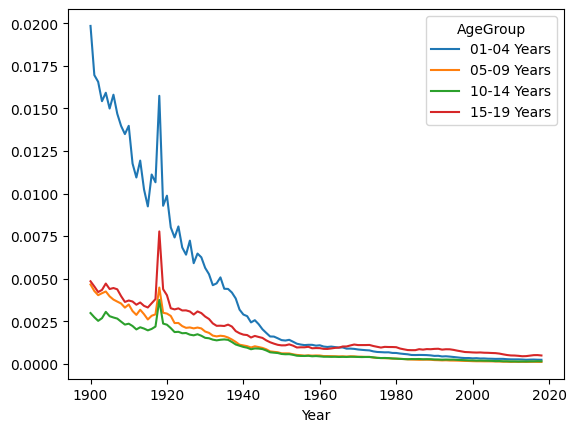

In [177]:
mortality_data.pivot(index='Year',columns='AgeGroup')['DeathRate'].plot()

<Axes: ylabel='AgeGroup'>

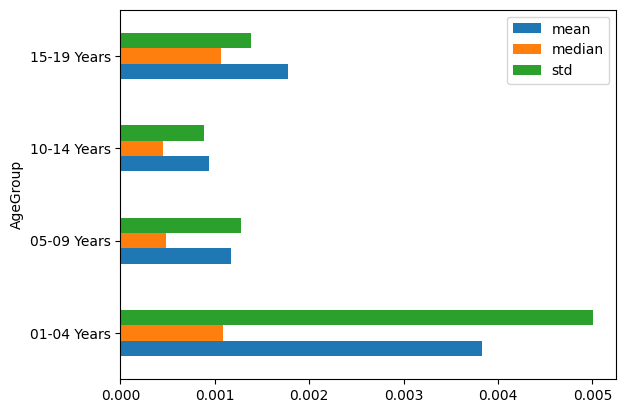

In [178]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std']).plot.barh()

### 🤔 Reflection: Visualization

**Q16:** Looking at the line plot, what overall trend do you see in death rates over time? Why do you think this is?

*Your answer:*

**SOLUTION:** Death rates have **dramatically decreased** over time for all age groups, especially for the youngest children (1-4 Years).

This is likely due to:
1. **Medical advances** - vaccines, antibiotics, better treatments
2. **Improved sanitation** - clean water, sewage systems
3. **Better nutrition** - food safety, availability
4. **Public health initiatives** - health education, disease prevention
5. **Safer living conditions** - building codes, child safety regulations


---

## Summary

In this exercise, you explored the key Pandas operations for data analysis:

1. **Getting data** - Reading from URLs and files, saving/restoring with pickle
2. **Examining data** - head(), tail(), info(), describe(), nunique()
3. **Accessing data** - Column selection, row filtering, loc[], iloc[]
4. **Preparing data** - Sorting, statistics, column arithmetic, string manipulation
5. **Shaping data** - Setting indexes, pivoting, melting
6. **Analyzing data** - Grouping and aggregation
7. **Visualizing data** - Basic plots from DataFrames

---

### 🤔 Final Reflection

**Q17:** Which Pandas operation or concept from this exercise do you think will be most useful in your future data work? Why?

*Your answer:*

**SOLUTION:** Answers will vary. Common useful operations include:
- **groupby() and agg()** - Essential for summarizing data by categories
- **query()** - Intuitive way to filter data
- **pivot/melt** - Critical for reshaping data for different analyses
- **describe()** - Quick way to understand your data's distribution

**Q18:** What concept from this exercise would you like to learn more about?

*Your answer:*

**SOLUTION:** Answers will vary. Common areas students want to explore:
- More complex aggregations
- Advanced visualization techniques
- Handling missing data
- Merging multiple DataFrames
- Time series analysis
